In [25]:
import numpy as np
import scipy.io as sio
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.signal import welch
from scipy.stats import skew, kurtosis
# Load data
file_path = 'C:\\Users\\UC\\Documents\\NeuMa\\22117124\\new.mat'
new = sio.loadmat(file_path)
eeg_data = new['EEG']
labels= new['label_list']




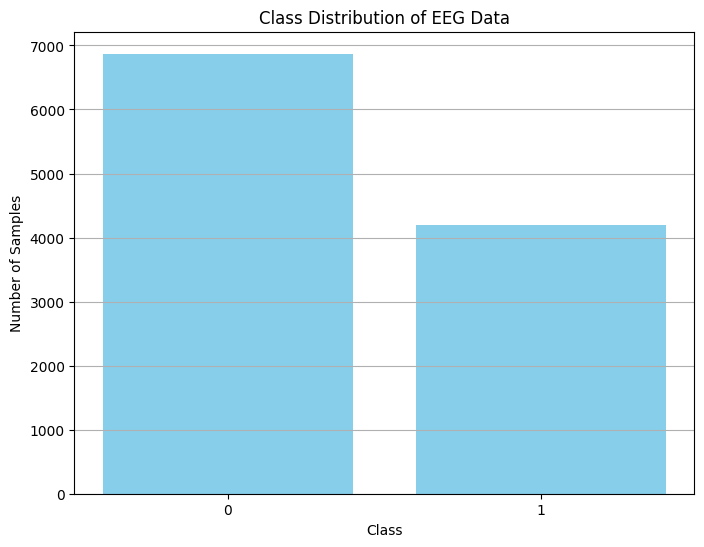

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming labels is your class labels array
# labels.shape = (11068,)

# Count the number of samples for each class
unique_classes, class_counts = np.unique(labels, return_counts=True)

# Plot class distribution
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color='skyblue')
plt.title('Class Distribution of EEG Data')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(unique_classes)
plt.grid(axis='y')
plt.show()


In [30]:
import numpy as np
import scipy.io as sio
from imblearn.over_sampling import SMOTE

# Load data
file_path = 'C:\\Users\\UC\\Documents\\NeuMa\\22117124\\new.mat'
new = sio.loadmat(file_path)
eeg_data = new['EEG']
labels = new['label_list']

# Reshape EEG data to have samples as the first dimension
eeg_data_reshaped = np.transpose(eeg_data, (2, 1, 0))
eeg_data_2d = np.reshape(eeg_data_reshaped, (-1, 19))  # Reshape to 2D array (samples x channels)

# Flatten the labels array
labels_flat = labels.flatten()

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
eeg_data_resampled, labels_resampled = smote.fit_resample(eeg_data_2d, labels_flat)

# Reshape the labels to match the resampled EEG data
labels_resampled = np.reshape(labels_resampled, (-1, 1))

# Calculate class distribution after applying SMOTE
unique_labels_resampled, counts_after = np.unique(labels_resampled, return_counts=True)
print("\nClass Distribution After SMOTE:")
for label, count in zip(unique_labels_resampled, counts_after):
    print(f"Class {label}: {count} samples")


ValueError: Found input variables with inconsistent numbers of samples: [3320400, 11068]

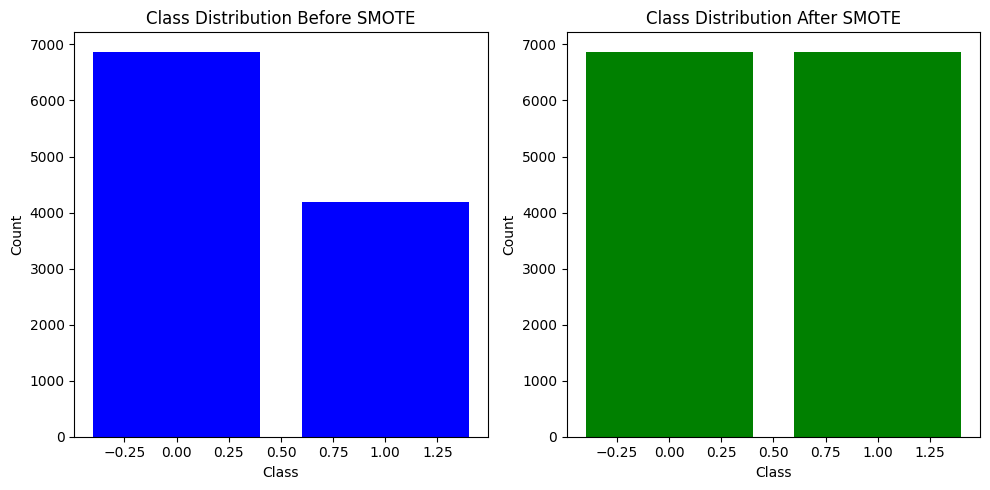

Shape of training data: (10995, 9804)
Shape of training labels: (10995,)
Shape of test data: (2749, 9804)
Shape of test labels: (2749,)


In [2]:
import numpy as np
import scipy.io as sio
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from scipy.signal import stft
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load data
file_path = 'C:\\Users\\UC\\Documents\\NeuMa\\22117124\\new.mat'
data = sio.loadmat(file_path)
eeg_data = data['EEG']
labels = data['label_list']

# Reshape EEG data to have samples as the first dimension
eeg_data_reshaped = np.transpose(eeg_data, (2, 1, 0))

# Apply STFT to EEG data
stft_data = np.abs(stft(eeg_data_reshaped, axis=1)[2])

# Flatten the STFT data
stft_data_flattened = stft_data.reshape(stft_data.shape[0], -1)

# Flatten the labels array
labels_flat = labels.flatten()

# Plot class distribution before SMOTE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
unique, counts = np.unique(labels_flat, return_counts=True)
plt.bar(unique, counts, color='blue')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
stft_data_resampled, labels_resampled = smote.fit_resample(stft_data_flattened, labels_flat)

# Plot class distribution after SMOTE
plt.subplot(1, 2, 2)
unique_resampled, counts_resampled = np.unique(labels_resampled, return_counts=True)
plt.bar(unique_resampled, counts_resampled, color='green')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Split the resampled data and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(stft_data_resampled, labels_resampled, test_size=0.2, random_state=42)

# Verify the shapes after splitting
print("Shape of training data:", X_train.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of test data:", X_test.shape)
print("Shape of test labels:", y_test.shape)


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stft_data_normalized = scaler.fit_transform(stft_data_flattened)
stft_data_resampled, labels_resampled = smote.fit_resample(stft_data_normalized, labels_flat)


In [6]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Reshape data for CNN
X_train_cnn = X_train.reshape(-1, stft_data.shape[1], stft_data.shape[2], 1)
X_test_cnn = X_test.reshape(-1, stft_data.shape[1], stft_data.shape[2], 1)

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(stft_data.shape[1], stft_data.shape[2], 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_cnn, y_test)
print("CNN Accuracy:", accuracy)


C:\Users\UC\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 35184
'y' sizes: 10995


STFT data shape: (11068, 129, 19, 4)
Flattened STFT data shape: (11068, 9804)
Labels shape: (11068,)
Resampled STFT data shape: (13744, 9804)
Resampled labels shape: (13744,)
Shape of training data: (10995, 9804)
Shape of training labels: (10995,)
Shape of test data: (2749, 9804)
Shape of test labels: (2749,)
Shape of training data for CNN: (10995, 129, 19, 4)
Shape of test data for CNN: (2749, 129, 19, 4)


C:\Users\UC\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.5701 - loss: 0.9779 - val_accuracy: 0.6112 - val_loss: 0.6611
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6504 - loss: 0.6385 - val_accuracy: 0.6362 - val_loss: 0.6317
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6888 - loss: 0.5875 - val_accuracy: 0.6594 - val_loss: 0.6218
Epoch 4/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7364 - loss: 0.5353 - val_accuracy: 0.6612 - val_loss: 0.6297
Epoch 5/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.7645 - loss: 0.4932 - val_accuracy: 0.6644 - val_loss: 0.6938
Epoch 6/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8054 - loss: 0.4321 - val_accuracy: 0.6562 - val_loss: 0.6619
Epoch 7/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8407 - loss: 0.3672 - val_accuracy: 0.6562 - val_loss: 0.6967
Epoch 8/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8671 - loss: 0.3229 - val_accu

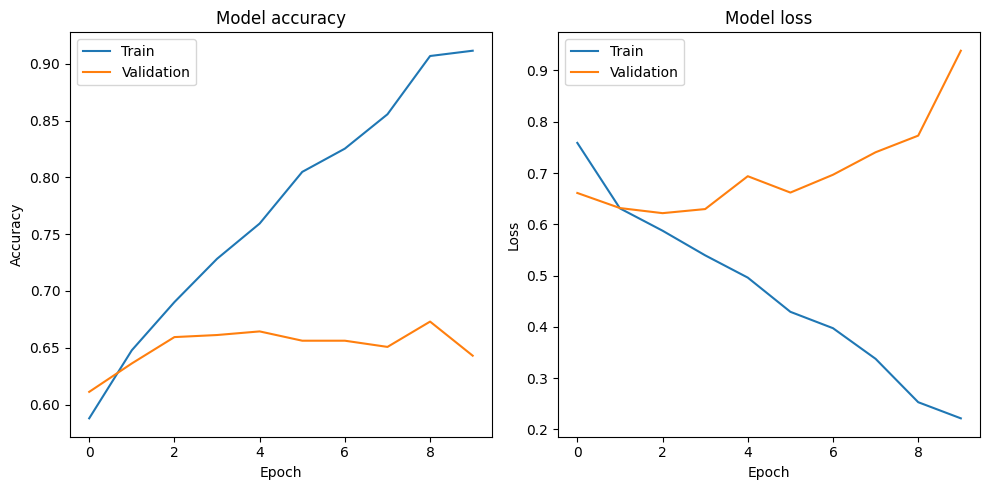

86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


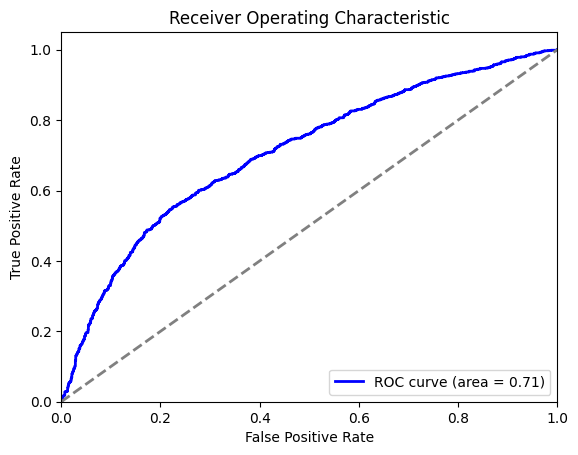

AUC: 0.7086016863870851


In [28]:
import numpy as np
import scipy.io as sio
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load data
file_path = 'C:\\Users\\UC\\Documents\\NeuMa\\22117124\\new.mat'
data = sio.loadmat(file_path)
eeg_data = data['EEG']
labels = data['label_list']

# Reshape EEG data to have samples as the first dimension
eeg_data_reshaped = np.transpose(eeg_data, (2, 1, 0))

# Apply STFT to EEG data
stft_data = np.abs(stft(eeg_data_reshaped, axis=1)[2])

# Check shapes after STFT
print("STFT data shape:", stft_data.shape)

# Flatten the STFT data
stft_data_flattened = stft_data.reshape(stft_data.shape[0], -1)

# Flatten the labels array
labels_flat = labels.flatten()

# Check shapes after flattening
print("Flattened STFT data shape:", stft_data_flattened.shape)
print("Labels shape:", labels_flat.shape)

# Normalize the STFT data
scaler = StandardScaler()
stft_data_normalized = scaler.fit_transform(stft_data_flattened)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
stft_data_resampled, labels_resampled = smote.fit_resample(stft_data_normalized, labels_flat)

# Check shapes after SMOTE
print("Resampled STFT data shape:", stft_data_resampled.shape)
print("Resampled labels shape:", labels_resampled.shape)

# Split the resampled data and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(stft_data_resampled, labels_resampled, test_size=0.2, random_state=42)

# Verify the shapes after splitting
print("Shape of training data:", X_train.shape)
print("Shape of training labels:", y_train.shape)
print("Shape of test data:", X_test.shape)
print("Shape of test labels:", y_test.shape)

# Determine the original time and frequency dimensions
num_time_bins = 129
num_freq_bins = 19
num_channels = 4

# Reshape data for CNN
X_train_cnn = X_train.reshape(-1, num_time_bins, num_freq_bins, num_channels)
X_test_cnn = X_test.reshape(-1, num_time_bins, num_freq_bins, num_channels)

# Check shapes after reshaping for CNN
print("Shape of training data for CNN:", X_train_cnn.shape)
print("Shape of test data for CNN:", X_test_cnn.shape)

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(num_time_bins, num_freq_bins, num_channels)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_cnn, y_test)
print("CNN Accuracy:", accuracy)

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities on test data
y_pred_proba = model.predict(X_test_cnn)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print("AUC:", roc_auc)

In [25]:
import numpy as np
import scipy.io as sio
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from scipy.signal import stft

# Load data
file_path = 'C:\\Users\\UC\\Documents\\NeuMa\\22117124\\new.mat'
data = sio.loadmat(file_path)
eeg_data = data['EEG']
labels = data['label_list']

# Reshape EEG data to have samples as the first dimension
eeg_data_reshaped = np.transpose(eeg_data, (2, 1, 0))

# Apply STFT to EEG data
stft_data = np.abs(stft(eeg_data_reshaped, axis=1)[2])

# Flatten the STFT data
stft_data_flattened = stft_data.reshape(stft_data.shape[0], -1)

# Flatten the labels array
labels_flat = labels.flatten()

# Normalize the STFT data
scaler = StandardScaler()
stft_data_normalized = scaler.fit_transform(stft_data_flattened)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
stft_data_resampled, labels_resampled = smote.fit_resample(stft_data_normalized, labels_flat)

# Split the resampled data and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(stft_data_resampled, labels_resampled, test_size=0.2, random_state=42)

# Determine the original time and frequency dimensions
num_time_bins = 129
num_freq_bins = 19
num_channels = 4

# Reshape data for CNN
X_train_cnn = X_train.reshape(-1, num_time_bins, num_freq_bins, num_channels)
X_test_cnn = X_test.reshape(-1, num_time_bins, num_freq_bins, num_channels)

# Define CNN model up to the Flatten layer
input_shape = (num_time_bins, num_freq_bins, num_channels)
input_layer = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
# Add a Dense layer for binary classification
x = Dense(1, activation='sigmoid')(x)
model = Model(inputs=input_layer, outputs=x)
feature_extractor = Model(inputs=input_layer, outputs=x)

feature_extractor.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the feature extractor model
feature_extractor.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Define a custom transformer for feature extraction
class FeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, feature_extractor):
        self.feature_extractor = feature_extractor

    def fit(self, X, y=None):
        # No fitting necessary for feature extraction
        return self

    def transform(self, X):
        return self.feature_extractor.predict(X)

# Create a feature extractor instance
feature_extractor_transformer = FeatureExtractor(feature_extractor)

# Ensure binary targets
y_train_binary = (y_train > 0).astype(int)
y_test_binary = (y_test > 0).astype(int)

# Define ensemble classifiers
clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2 = SVC(probability=True, random_state=42)

# Create a pipeline with feature extraction and classification
pipeline = Pipeline([
    ('feature_extractor', feature_extractor_transformer),
    ('classifier', VotingClassifier(estimators=[('rf', clf1), ('svc', clf2)], voting='soft'))
])

# Train the pipeline
pipeline.fit(X_train_cnn, y_train_binary)

# Evaluate the pipeline
accuracy = pipeline.score(X_test_cnn, y_test_binary)
print("Pipeline Accuracy:", accuracy)


Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5474 - loss: 0.8172 - val_accuracy: 0.6098 - val_loss: 0.6608
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6528 - loss: 0.6262 - val_accuracy: 0.6380 - val_loss: 0.6381
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6861 - loss: 0.5836 - val_accuracy: 0.6535 - val_loss: 0.6212
Epoch 4/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7518 - loss: 0.5220 - val_accuracy: 0.6498 - val_loss: 0.6314
Epoch 5/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7635 - loss: 0.4917 - val_accuracy: 0.6680 - val_loss: 0.6691
Epoch 6/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8037 - loss: 0.4288 - val_accuracy: 0.6762 - val_loss: 0.6130
Epoch 7/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8464 - loss: 0.3748 - val_accuracy: 0.6712 - val_loss: 0.6403
Epoch 8/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8505 - loss: 0.3565 - val_accuracy: 0.

344/344 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
86/86 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


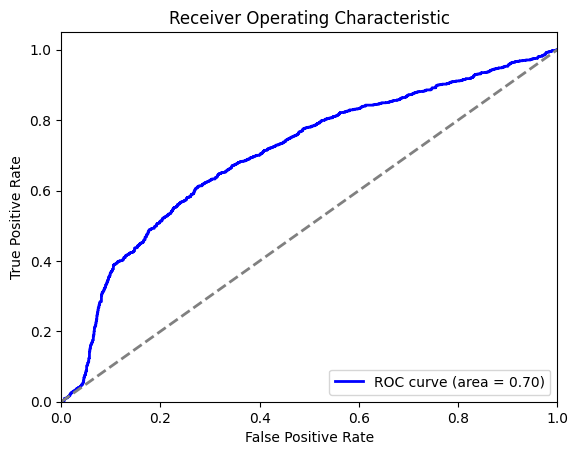

AUC: 0.7026498098577376


In [26]:
# Train the pipeline
pipeline.fit(X_train_cnn, y_train_binary)

# Predict probabilities on test data
y_pred_proba = pipeline.predict_proba(X_test_cnn)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba)
roc_auc = roc_auc_score(y_test_binary, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print("AUC:", roc_auc)
